# Basic Operations on Images

## Goal

Learn to:

* Access pixel values and modify them
* Access image properties
* Setting Region of Image (ROI)
* Splitting and Merging images

Almost all the operations in this section is mainly related to **Numpy** rather than OpenCV. A good knowledge of **Numpy** is required to write better optimized code with OpenCV.

(Examples will be shown in Python terminal since most of them are just single line codes)


## Accessing and Modifying pixel values

Let’s load a color image first:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fstr = './DIP/img/messi5.jpg'
fstr = './img/messi5.jpg'

img_ori = cv2.imread(fstr)

if img_ori is None:
    print('Error : Loading image')
else:
    print('OK : Loading image')
    
img = img_ori.copy()

OK : Loading image


You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [18]:
px = img[100,100]
print(px)
px

[156 166 200]


array([156, 166, 200], dtype=uint8)

In [19]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)
blue

156


156

You can modify the pixel values the same way.

In [20]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


> ## Warning
>
> * `Numpy` is a optimized library for ***fast array calculations***. 
> * So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.

## `ndarray.item()` and `ndarray.itemset()`

Better pixel accessing and editing method :

> ## Note
>
> * Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. 
> * For individual pixel access, `Numpy` array methods, `array.item()` and `array.itemset()` is considered to be better. 
> * But it always returns a **scalar**. 
> * So if you want to access all B,G,R values, you need to call `array.item()` separately for all.

In [21]:
# accessing RED value
img.item(10,10,2)

59

In [22]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## Accessing Image Properties

Image properties include 
* number of rows, columns and channels, 
* type of image data, 
* number of pixels 
* etc.

**Shape of image** is accessed by `img.shape`. 
* It returns a tuple of number of rows, columns and channels (if image is color):

In [23]:
print(img.shape)

(342, 548, 3)


> ## Note
>
> If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.

**Total number of pixels** is accessed by `img.size`:

In [24]:
print(img.size)


size = 1
for i in img.shape:
    size=size *i
size = 0 if size == 1 else size
print(size)

562248
562248


**Image datatype** is obtained by `img.dtype`:

In [25]:
print(img.dtype)

uint8


> ## Note
>
>img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

## Image ROI

Sometimes, you will have to play with **certain region of images**. 
* For eye detection in images, 
* first perform ***face detection*** over the image until the face is found, 
* then *search within the face region* **for eyes**. 

This approach improves 
* **accuracy** (because eyes are always on faces :D ) and 
* **performance** (because we search for a *small area*).

**ROI** is also obtained using `Numpy` ***indexing***. 

* Here we are selecting the ball and copying it to another region in the image:

In [2]:
cv2.imshow('original imgae',img_ori) #expects true color
img = img_ori.copy()

ball = img[280:340,330:390]
print(ball.shape)
img[273:333,100:160] = ball

cv2.imshow('modified image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(60, 60, 3)


# Mouse Event로 ROI 를 Cropping하기!

In [7]:
isDragging = False
x0,y0,w,h = -1,-1,-1,-1

ing_clr = (255,0,0)
end_clr = (0,0,255)

def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, w, h, img
    
    if event == cv2.EVENT_LBUTTONDOWN: # 드래그 시작을 위한 왼버튼 누르는 이벤트
        isDragging = True
        x0=x
        y0=y
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw = img.copy()
            cv2.rectangle(img_draw, (x0,y0), (x,y),ing_clr,2)
            cv2.imshow('img', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            w = x-x0
            h = y-y0
            print(f'x:{x: 3d},y:{y: 3d},w:{w: 3d},h:{h: 3d}')
            if w > 0 and h > 0:
                # 메모리로 가져와서 사용
                img_draw = img.copy()
                cv2.rectangle(img_draw, (x0,y0), (x,y),end_clr,2 )
                cv2.imshow('img', img_draw)
                roi = img[y0:y0+h,x0:x0+w]
                cv2.imshow('roi', roi)
                cv2.moveWindow('roi',0,0)
                cv2.imwrite('./roi.jpg',roi)
                print('roi saved!')
            else:
                cv2.imshow('img', img)
                print('roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!')

img = cv2.imread(fstr)
cv2.imshow('img', img)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()
                  
        

x: 16,y: 251,w:-126,h: 147
roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!
x: 55,y: 230,w:-41,h: 147
roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!
x: 238,y: 133,w: 171,h:-132
roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!
x: 341,y: 212,w: 153,h: 102
roi saved!
x: 215,y: 155,w:-247,h: -9
roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!
x: 298,y: 256,w: 194,h: 154
roi saved!
x: 409,y: 184,w: 66,h: 84
roi saved!
x: 361,y: 169,w: 91,h: 62
roi saved!
x: 298,y: 192,w: 105,h: 59
roi saved!
x: 300,y: 208,w: 68,h: 63
roi saved!
x: 321,y: 254,w: 63,h: 104
roi saved!
x: 342,y: 295,w: 46,h: 72
roi saved!
x: 242,y: 245,w: 58,h: 64
roi saved!
x: 191,y: 165,w: 140,h: 89
roi saved!
x: 102,y: 137,w:  9,h: 41
roi saved!
x: 92,y: 143,w: 14,h: 53
roi saved!


# `cv2.selectROI(~)`

`ret_val = cv2.selectROI([window_name], img [, showCrossHair=True, fromCenter=False]`

* `window_name` : ROI 선택을 수행할 window이름. `str`
* `img` : 보여질 이미지.
* `showCrossHair` : ROI 중심에 십자모양 표시 여부
* `fromCenter` : 마우스 시작지점을 영역의 중심으로 간주

* `ret_val` = (x,y,w,h) of ROI

> * 선택시 space or Enter
> * 선택을 취소하고 싶을 경우 `c`키 누름 : `ret_val`는 모두 0으로


In [8]:
x, y, w, h = cv2.selectROI('img', img, True,True)
                        
if w and h:
    print(f'x:{x: 3d},y:{y: 3d},w:{w: 3d},h:{h: 3d}')
    roi = img[y:y+h, x:x+w]
    cv2.imshow('roi', roi)
    cv2.moveWindow('roi', 0,0)
    cv2.imwrite('roi.jpg',roi)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# x:  3,y: 283,w: 175,h: 44

x:  0,y:  0,w: 538,h: 184


## Splitting and Merging Image Channels

The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

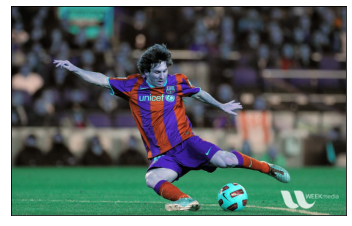

In [12]:
# opencv
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

#plt.imshow(b)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

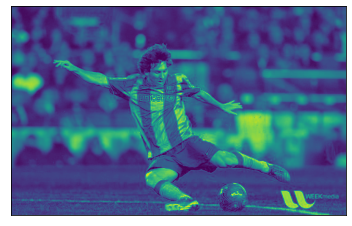

In [13]:
# numpy
b2,g2,r2 = np.dsplit(img,3)

plt.imshow(b)
plt.xticks([]),plt.yticks([])
plt.show()

In [31]:
print(np.array_equal(b,b2))

False


Or

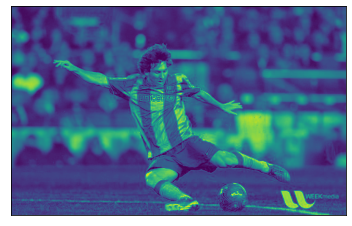

In [32]:
b = img[:,:,0]
plt.imshow(b)
plt.xticks([]),plt.yticks([])
plt.show()

In [33]:
cv2.imshow('blue channel img',b)
cv2.waitKey(0)
cv2.destroyAllWindows()

Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. You can simply use Numpy indexing which is faster.

In [34]:
img[:,:,2]= 0

In [14]:
cv2.imshow('tete', img[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
cv2.imshow('zero red channel img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

> ## Warning
>
> * `cv2.split()` is a costly operation (in terms of time), so only use it if necessary. 
> * Numpy indexing is much more efficient and should be used if possible.

## Making Borders for Images (Padding)

If you want to create a border around the image, something like a photo frame, you can use `cv2.copyMakeBorder()` function. But it has **more applications for convolution operation**, zero padding etc. This function takes following arguments:

* `src` - input image
* `top, bottom, left, right` - **border width** *in number of pixels* in corresponding directions
* `borderType` - **Flag** defining what kind of border to be added. It can be following types:
    * `cv2.BORDER_CONSTANT` - Adds a constant colored border. The value should be given as next argument.
    * `cv2.BORDER_REFLECT` - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    * `cv2.BORDER_REFLECT_101` or `cv2.BORDER_DEFAULT` - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    * `cv2.BORDER_REPLICATE` - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    * `cv2.BORDER_WRAP` - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
* `value` - Color of border if border type is `cv2.BORDER_CONSTANT`

Below is a sample code demonstrating all these border types for better understanding:

(120, 98, 3)
See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):


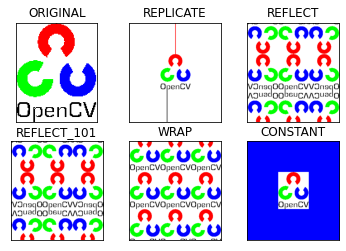

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0] #BGR

fstr = './DIP/img/opencv_logo.png'
fstr = './img/opencv_logo.png'

# ----------------------------
# Covnert the transparent part of PNG into white
img1 = cv2.imread(fstr,cv2.IMREAD_UNCHANGED)
alpha_channel = img1[:, :, 3]
_, mask = cv2.threshold(alpha_channel, 254, 255, cv2.THRESH_BINARY)  # binarize mask
color = img1[:, :, :3]
img1 = cv2.bitwise_not(cv2.bitwise_not(color, mask=mask))

print(img1.shape)

replicate  = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect    = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap       = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant   = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)


#for matplotlib
img1       = img1[:,:,::-1]    
replicate  = replicate[:,:,::-1]
reflect    = reflect[:,:,::-1]
reflect101 = reflect101[:,:,::-1]
wrap       = wrap[:,:,::-1]
constant   = constant[:,:,::-1]


print('See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):')
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.xticks([]);plt.yticks([])
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.xticks([]);plt.yticks([])
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.xticks([]);plt.yticks([])
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.xticks([]);plt.yticks([])
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.xticks([]);plt.yticks([])
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.xticks([]);plt.yticks([])
#plt.axis('off')

plt.show()